In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import  MinMaxScaler
import logging
import random
import numpy as np

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import pickle
import seaborn as sns

In [2]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import geopandas as gpd

In [3]:
coastline = gpd.read_file("maltacoast/coastline_polygon.shp")

# Read Data

In [4]:
station = 'MSDA'

stations_sea_rms = pd.read_parquet(f"Processed Data/15.03.2025 Data/{station}.parquet")

#random seed for data splitting
randseed = 27

# Split Data

In [5]:
mlvariables = pd.DataFrame(stations_sea_rms)

X = mlvariables.loc[:, mlvariables.columns.str.startswith(station)] #input variable is columns that start with station name
Y = mlvariables.loc[:, ~mlvariables.columns.str.startswith(station) & (mlvariables.columns != 'sea_mode')] #target variable are the remaining columns
T = mlvariables.index.tolist() #Time series

In [6]:
mlvariables

,MSDA/Z/0.05-0.2,MSDA/Z/0.2-0.35,MSDA/Z/0.35-0.5,MSDA/Z/0.5-0.65,MSDA/Z/0.65-0.8,MSDA/Z/0.8-0.95,MSDA/Z/0.95-1.1,MSDA/Z/1.1-1.25,MSDA/Z/1.25-1.4,MSDA/Z/1.4-1.55,...,MSDA/E/1.7-1.85,MSDA/E/1.85-2.0,"(35.9375, 14.541667938232422)","(35.895835876464844, 14.583335876464844)","(35.97916793823242, 14.5)","(35.97916793823242, 14.458335876464844)","(35.9375, 14.583335876464844)",sea_mean,sea_median,sea_mode
index,,,,,,,,,,,,,,,,,,,,,
2019-12-15 22:00:00+00:00,1.068198e-07,2.055905e-07,1.799618e-07,1.071796e-07,8.558397e-08,7.470811e-08,5.883538e-08,4.414615e-08,3.039092e-08,2.294980e-08,...,1.070589e-08,8.969002e-09,0.661,0.674,0.729,0.668,0.746,0.6956,0.674,0.661
2019-12-15 23:00:00+00:00,1.018865e-07,1.904319e-07,1.657022e-07,9.821810e-08,8.580250e-08,8.964862e-08,7.187746e-08,4.777275e-08,3.105068e-08,2.199742e-08,...,1.239977e-08,9.845715e-09,0.637,0.651,0.698,0.642,0.718,0.6692,0.651,0.637
2019-12-16 00:00:00+00:00,6.538788e-08,1.229828e-07,8.665394e-08,3.619712e-08,6.266621e-08,3.569900e-08,2.709640e-08,1.567862e-08,1.371716e-08,1.165442e-08,...,9.683351e-09,5.903001e-09,0.629,0.641,0.669,0.614,0.705,0.6516,0.641,0.614
2019-12-16 01:00:00+00:00,1.004129e-07,1.557934e-07,1.507882e-07,9.611345e-08,1.136409e-07,9.521546e-08,6.078428e-08,3.888451e-08,2.781511e-08,2.166353e-08,...,1.252213e-08,9.706230e-09,0.604,0.650,0.647,0.594,0.705,0.6400,0.647,0.594
2019-12-16 02:00:00+00:00,9.930892e-08,1.454494e-07,1.421136e-07,9.645351e-08,1.087598e-07,8.652603e-08,5.783488e-08,4.088768e-08,2.951832e-08,2.349357e-08,...,1.293625e-08,9.918780e-09,0.590,0.665,0.630,0.580,0.710,0.6350,0.630,0.580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-29 07:00:00+00:00,3.820704e-08,1.104320e-07,1.685422e-07,1.337195e-07,1.161543e-07,1.045925e-07,8.550392e-08,6.014288e-08,4.389784e-08,3.337087e-08,...,2.079461e-08,1.969551e-08,0.430,0.407,0.526,0.469,0.510,0.4684,0.469,0.407
2021-09-29 08:00:00+00:00,3.926422e-08,1.027405e-07,1.770549e-07,1.346009e-07,1.199304e-07,1.133272e-07,9.739542e-08,6.928861e-08,4.576838e-08,3.481530e-08,...,2.233195e-08,2.049192e-08,0.426,0.407,0.512,0.459,0.498,0.4604,0.459,0.407
2021-09-29 09:00:00+00:00,6.663164e-08,9.720810e-08,1.727257e-07,1.318233e-07,1.421033e-07,1.507918e-07,8.968933e-08,6.094039e-08,4.596117e-08,3.760673e-08,...,2.164998e-08,2.096109e-08,0.420,0.403,0.498,0.450,0.485,0.4512,0.450,0.403


In [7]:
#scale values between 0 and 1
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

#fit the scalers
scaler_x.fit(X) 
scaler_y.fit(Y)

MinMaxScaler()

In [8]:
#apply the scalers
Xscale = scaler_x.transform(X) 
Yscale = scaler_y.transform(Y)

In [9]:
#number of chunks in training/test set
nchunks = 40

#number of ks for kfold cross validation
kfolds = 5

lenchunk = round(Xscale.shape[0]/nchunks)

In [10]:
#Generates k-th datasets for Cross Validation 
list_of_dataset = [{'idx': [], 'XscaleTrain': [], 'YscaleTrain': [], 'XscaleTest': [], 'YscaleTest': []} for number in range(kfolds)]

In [11]:
#split data into 40 chunks (or nchunks)
all_chunks = np.array_split(np.arange(Xscale.shape[0]), nchunks)

#random shuffle of chunks
random.seed(randseed)
random.shuffle(all_chunks)

#this method only works if nchunks is perfectly divisible by kfolds (eg 40/5 = 8)
if nchunks % kfolds != 0:
    raise ValueError("Number of chunks must be divisible by number of folds.")

nchunks_per_fold = nchunks // kfolds

#assign chunks to folds
for i in range(kfolds):
    test_chunks = all_chunks[i*nchunks_per_fold : (i+1)*nchunks_per_fold] #separate date from chunk i=1: 0 to 7, i=2: 8 to 15...
    train_chunks = all_chunks[ : i*nchunks_per_fold] + all_chunks[(i+1)*nchunks_per_fold:] #one set for test set, remaining for training
    train_idx = np.concatenate(train_chunks)
    test_idx = np.concatenate(test_chunks)
    
    list_of_dataset[i]['idx'] = train_idx
    list_of_dataset[i]['XscaleTrain'] = Xscale[train_idx, :]
    list_of_dataset[i]['YscaleTrain'] = Yscale[train_idx, :]
    list_of_dataset[i]['XscaleTest'] = Xscale[test_idx, :]
    list_of_dataset[i]['YscaleTest'] = Yscale[test_idx, :]

In [12]:
len(list_of_dataset[0]['idx'])

12549

# Build and train RF Regressor

In [13]:
# random forest maximum depth     
RF_max_depth = 30

# random forest number of estimators  
RF_n_estimators = 100

# random forest maximum features 
RF_max_features = 'log2'

# random forest min samples to split
RF_min_samples_split = 10

#random forest min samples per leaf
RF_min_samples_leaf = 1

In [14]:
RF_model = RandomForestRegressor(bootstrap = True,
                                 max_depth=RF_max_depth,
                                 n_estimators=RF_n_estimators,
                                 max_features= RF_max_features,
                                 min_samples_split = RF_min_samples_split,
                                 min_samples_leaf = RF_min_samples_leaf,
                                 verbose=1)

In [15]:
#Initiliaze the empty variables
Ypred = None
YTest = None

In [16]:
#Applies the learning/prediction to the k datasets
Ypred_kfold = []
YTest_kfold = []

for i, dic in enumerate(list_of_dataset):
    Ypred = None
    YTest = None
    
    #Fits the model to training data
    RF_model.fit(dic['XscaleTrain'], dic['YscaleTrain'])
    
    #Predicts the sea wave data by using the testing data
    ypred  = RF_model.predict(dic['XscaleTest'])
    
    #Inverts the scaling of the data and stores the results in the predicted/testing arrays
    Ypred = scaler_y.inverse_transform(ypred)
    YTest = scaler_y.inverse_transform(dic['YscaleTest'])
    
    #Append to kfold results
    Ypred_kfold.append(Ypred)
    YTest_kfold.append(YTest)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    5.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.8s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    5.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    5.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


In [17]:
len(Ypred_kfold)

5

# Compute evaluation metrics and save data to parquet

In [36]:
results = []

#the names of the target variables are the last eight columns of the station data
target_names = mlvariables.columns[-8:-1].tolist()
for f in range(kfolds):
    Ypred = Ypred_kfold[f]
    YTest = YTest_kfold[f]

    #convert to df to save the data
    Ypred_df = pd.DataFrame(Ypred)
    YTest_df = pd.DataFrame(YTest)

    #save to parquet to preserve dat
    Ypred_df.to_parquet(f"results/kfold_data/{station}/fold{f}_Ypred.parquet", engine="pyarrow")
    YTest_df.to_parquet(f"results/kfold_data/{station}/fold{f}_YTest.parquet", engine="pyarrow")
    
    for i, target in enumerate(target_names):
        mae = mean_absolute_error(YTest[:, i], Ypred[:, i])
        mse = mean_squared_error(YTest[:, i], Ypred[:, i])
        rmse = np.sqrt(mse)
        r2 = r2_score(YTest[:, i], Ypred[:, i])
    
        #append the results as a row
        results.append([f, station, target, RF_max_depth, RF_n_estimators, RF_max_features, mae, mse, rmse, r2])

#creates results dataframe
results_df = pd.DataFrame(results, columns=["Fold", "Station", "Target Variable", "RF_max_depth", "RF_n_estimators", "RF_max_features", "MAE", "MSE", "RMSE", "R2"])

In [37]:
results_df

,Fold,Station,Target Variable,RF_max_depth,RF_n_estimators,RF_max_features,MAE,MSE,RMSE,R2
0,0,MSDA,"(35.9375, 14.541667938232422)",30,100,log2,0.152255,0.053023,0.230268,0.793293
1,0,MSDA,"(35.895835876464844, 14.583335876464844)",30,100,log2,0.161576,0.055294,0.235146,0.798164
2,0,MSDA,"(35.97916793823242, 14.5)",30,100,log2,0.161815,0.057510,0.239813,0.821012
3,0,MSDA,"(35.97916793823242, 14.458335876464844)",30,100,log2,0.155997,0.053052,0.230330,0.805822
4,0,MSDA,"(35.9375, 14.583335876464844)",30,100,log2,0.147620,0.049219,0.221853,0.846929
5,0,MSDA,sea_mean,30,100,log2,0.145279,0.048429,0.220067,0.826091
6,0,MSDA,sea_median,30,100,log2,0.152220,0.051939,0.227902,0.817769
7,1,MSDA,"(35.9375, 14.541667938232422)",30,100,log2,0.154117,0.055655,0.235913,0.843238
8,1,MSDA,"(35.895835876464844, 14.583335876464844)",30,100,log2,0.168841,0.058951,0.242797,0.845789
9,1,MSDA,"(35.97916793823242, 14.5)",30,100,log2,0.170327,0.085408,0.292247,0.830554


# Evaluate k-fold results

In [38]:
sea_mean_results = results_df[(results_df["Target Variable"] == "sea_mean")]
sea_mean_results.describe()

,Fold,RF_max_depth,RF_n_estimators,MAE,MSE,RMSE,R2
count,5.000000,5.0,5.0,5.000000,5.000000,5.000000,5.000000
mean,2.000000,30.0,100.0,0.140076,0.042625,0.204860,0.838596
std,1.581139,0.0,0.0,0.012140,0.011198,0.028659,0.028458
min,0.000000,30.0,100.0,0.119357,0.025263,0.158943,0.795433
25%,1.000000,30.0,100.0,0.139735,0.040937,0.202329,0.826091
50%,2.000000,30.0,100.0,0.145279,0.043086,0.207572,0.846620
75%,3.000000,30.0,100.0,0.146098,0.048429,0.220067,0.859208
max,4.000000,30.0,100.0,0.149912,0.055408,0.235390,0.865631


In [39]:
sea_median_results = results_df[(results_df["Target Variable"] == "sea_median")]
sea_median_results.describe()

,Fold,RF_max_depth,RF_n_estimators,MAE,MSE,RMSE,R2
count,5.000000,5.0,5.0,5.000000,5.000000,5.000000,5.000000
mean,2.000000,30.0,100.0,0.144357,0.045839,0.212159,0.828115
std,1.581139,0.0,0.0,0.013503,0.013246,0.032175,0.031692
min,0.000000,30.0,100.0,0.121961,0.026676,0.163327,0.777991
25%,1.000000,30.0,100.0,0.142024,0.042304,0.205680,0.817769
50%,2.000000,30.0,100.0,0.149765,0.045563,0.213454,0.837610
75%,3.000000,30.0,100.0,0.152220,0.051939,0.227902,0.851526
max,4.000000,30.0,100.0,0.155813,0.062715,0.250430,0.855680


# Plot some Data

In [40]:
#find the best performing fold
best_model_R2 = sea_mean_results.loc[sea_mean_results["R2"].idxmax()]
print(best_model_R2)

Fold                      1
Station                MSDA
Target Variable    sea_mean
RF_max_depth             30
RF_n_estimators         100
RF_max_features        log2
MAE                0.149912
MSE                0.055408
RMSE                0.23539
R2                 0.865631
Name: 12, dtype: object


Fold 3 (the first fold) produced the highest R2 for sea_mean

In [41]:
bestfoldnum = 1

In [42]:
best_Ypred = pd.read_parquet(f"results/kfold_data/{station}/fold{bestfoldnum}_Ypred.parquet")
best_YTest = pd.read_parquet(f"results/kfold_data/{station}/fold{bestfoldnum}_YTest.parquet")

In [43]:
# we need to find the index in date/time of the test set, as it was lost in transformation

#create the full list of indexes - for WDD there were 9421 rows of data
full_list = list(range(mlvariables.shape[0]))

#identify the numbers that are to be removed for bestfold
remove_list = list_of_dataset[bestfoldnum]['idx']

#remove the indexes that were part of the training set from the index
filtered_list = list(set(full_list) - set(remove_list))

#retrieve the index from the original dataframe mlvariables, to get date and time stamps
match_index = mlvariables.iloc[filtered_list].index

best_Ypred.index = match_index
best_YTest.index = match_index

#update the header
header = [
    (35.9375, 14.541667938232422),
    (35.895835876464844, 14.583335876464844),
    (35.97916793823242, 14.5),
    (35.97916793823242, 14.458335876464844),
    (35.9375, 14.583335876464844),
    "sea_mean",
    "sea_median"
]

best_Ypred.columns = header
best_YTest.columns = header

In [44]:
best_Ypred

,"(35.9375, 14.541667938232422)","(35.895835876464844, 14.583335876464844)","(35.97916793823242, 14.5)","(35.97916793823242, 14.458335876464844)","(35.9375, 14.583335876464844)",sea_mean,sea_median
index,,,,,,,
2019-12-15 22:00:00+00:00,0.554130,0.771815,0.615077,0.543244,0.812517,0.659356,0.602168
2019-12-15 23:00:00+00:00,0.738867,0.906901,0.836900,0.746092,0.996305,0.845013,0.804903
2019-12-16 00:00:00+00:00,0.790022,0.955880,0.895037,0.802747,1.045559,0.897849,0.867391
2019-12-16 01:00:00+00:00,0.964218,1.149284,1.098679,0.977848,1.282792,1.094564,1.055737
2019-12-16 02:00:00+00:00,0.740237,0.851609,0.805251,0.723536,0.927613,0.809649,0.781518
...,...,...,...,...,...,...,...
2020-11-06 15:00:00+00:00,0.231498,0.256229,0.256930,0.232872,0.282044,0.251915,0.246789
2020-11-06 16:00:00+00:00,0.289348,0.317498,0.309261,0.283838,0.339784,0.307946,0.301538
2020-11-06 17:00:00+00:00,0.191679,0.224507,0.214979,0.192025,0.247834,0.214205,0.205211


In [45]:
best_YTest

,"(35.9375, 14.541667938232422)","(35.895835876464844, 14.583335876464844)","(35.97916793823242, 14.5)","(35.97916793823242, 14.458335876464844)","(35.9375, 14.583335876464844)",sea_mean,sea_median
index,,,,,,,
2019-12-15 22:00:00+00:00,0.293,0.583,0.387,0.335,0.579,0.4354,0.387
2019-12-15 23:00:00+00:00,0.359,0.633,0.475,0.417,0.652,0.5072,0.475
2019-12-16 00:00:00+00:00,0.398,0.668,0.508,0.449,0.695,0.5436,0.508
2019-12-16 01:00:00+00:00,0.411,0.699,0.528,0.473,0.724,0.5670,0.528
2019-12-16 02:00:00+00:00,0.464,0.749,0.596,0.538,0.790,0.6274,0.596
...,...,...,...,...,...,...,...
2020-11-06 15:00:00+00:00,0.208,0.221,0.236,0.212,0.253,0.2260,0.221
2020-11-06 16:00:00+00:00,0.202,0.215,0.228,0.205,0.244,0.2188,0.215
2020-11-06 17:00:00+00:00,0.197,0.209,0.220,0.199,0.236,0.2122,0.209


In [46]:
best_Ypred.index = best_Ypred.index.tz_convert(None)
best_YTest.index = best_YTest.index.tz_convert(None)

In [47]:
print(best_YTest.index.tolist())

[Timestamp('2019-12-15 22:00:00'), Timestamp('2019-12-15 23:00:00'), Timestamp('2019-12-16 00:00:00'), Timestamp('2019-12-16 01:00:00'), Timestamp('2019-12-16 02:00:00'), Timestamp('2019-12-16 03:00:00'), Timestamp('2019-12-16 04:00:00'), Timestamp('2019-12-16 05:00:00'), Timestamp('2019-12-16 06:00:00'), Timestamp('2019-12-16 07:00:00'), Timestamp('2019-12-16 08:00:00'), Timestamp('2019-12-16 09:00:00'), Timestamp('2019-12-16 10:00:00'), Timestamp('2019-12-16 11:00:00'), Timestamp('2019-12-16 12:00:00'), Timestamp('2019-12-16 13:00:00'), Timestamp('2019-12-16 14:00:00'), Timestamp('2019-12-16 15:00:00'), Timestamp('2019-12-16 16:00:00'), Timestamp('2019-12-16 17:00:00'), Timestamp('2019-12-16 18:00:00'), Timestamp('2019-12-16 19:00:00'), Timestamp('2019-12-16 20:00:00'), Timestamp('2019-12-16 21:00:00'), Timestamp('2019-12-16 22:00:00'), Timestamp('2019-12-16 23:00:00'), Timestamp('2019-12-17 00:00:00'), Timestamp('2019-12-17 01:00:00'), Timestamp('2019-12-17 02:00:00'), Timestamp('20

#best_Ypred.to_csv(f"results/kfold_data/{station}/bestYpred.csv")

2019-12-18 04:00:00
2021-01-20 16:00:00
2020-06-03 14:00:00
2020-11-04 16:00:00


Text(0.5, 0.98, 'Plots of estimated SWH around station MSDA for various time intervals')

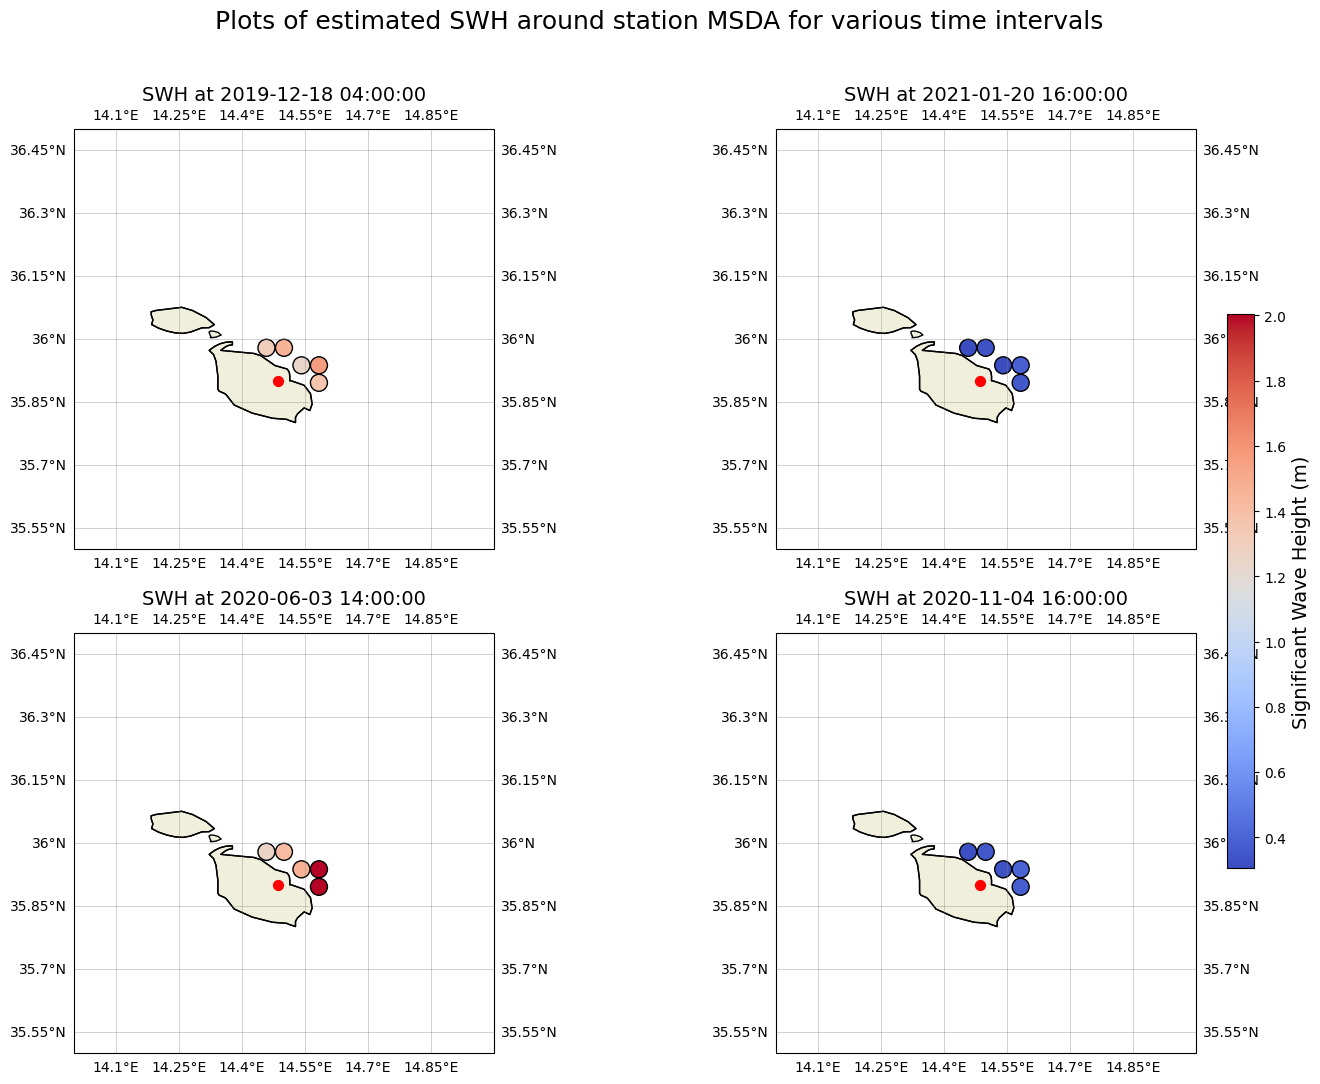

In [48]:
#Plot four timestamps in four subplots
best_Ypred.index = pd.to_datetime(best_Ypred.index)

selected_timestamps = [
    pd.to_datetime("2019-12-18 04:00:00"),
    pd.to_datetime("2021-01-20 16:00:00"),
    pd.to_datetime("2020-06-03 14:00:00"),
    pd.to_datetime("2020-11-04 16:00:00")
]

timestamps_to_plot = best_Ypred.loc[selected_timestamps]

#create the subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12), subplot_kw={'projection': ccrs.PlateCarree()})

#set map extent [west, east, south, north]
map_extent = [14.0, 15.0, 35.5, 36.5]

#create the subplots
for timestamp, ax in zip(timestamps_to_plot.index, axes.flat):
    print(timestamp)

    #set map extent
    ax.set_extent(map_extent, crs=ccrs.PlateCarree())

    #add map features
    ax.add_feature(cfeature.LAND, edgecolor='black')
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')

    #plot seismic stations - WDD
    ax.scatter(14.486952, 35.901233, color='red', marker='o', s=50, label='Seismic Stations')

    #get wave height data for this timestamp
    best_timestamp = best_Ypred.loc[timestamp, :]
    wave_heights = best_timestamp.iloc[:5] #first 5 columns have the SWH for the gridpoints
    coords = wave_heights.index.to_list() #get the coordinates of the gridpoints
    lons, lats = zip(*coords)
    heights = wave_heights.values

    #scatter plot of wave heights
    sc = ax.scatter(lats, lons, c=heights, cmap='coolwarm', edgecolor='black', s=150, vmin=timestamps_to_plot.min().min(), vmax=timestamps_to_plot.max().max())

    #add title
    ax.set_title(f"SWH at {timestamp}", fontsize=14)

    #add gridlines
    ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5)

#colourbar
cbar = fig.colorbar(sc, ax=axes, orientation='vertical', shrink=0.6, pad=0.02)
cbar.set_label("Significant Wave Height (m)", fontsize=14)

fig.suptitle(f"Plots of estimated SWH around station {station} for various time intervals",fontsize=18)

#plt.savefig('barcharts/bestMAE/sea_median/bestMAE_median_plot.png', bbox_inches='tight')

#plt.show()

C:\Users\erika\AppData\Local\Temp\ipykernel_10360\3221775839.py:71: UserWarning: Adding colorbar to a different Figure <Figure size 2000x1200 with 5 Axes> than <Figure size 2000x1200 with 5 Axes> which fig.colorbar is called on.
  cbar = fig.colorbar(sc, ax=axes, orientation='vertical', shrink=0.6, pad=0.02)


Text(0.5, 0.98, 'Plots of estimated and actual SWH around station MSDA for various time intervals')

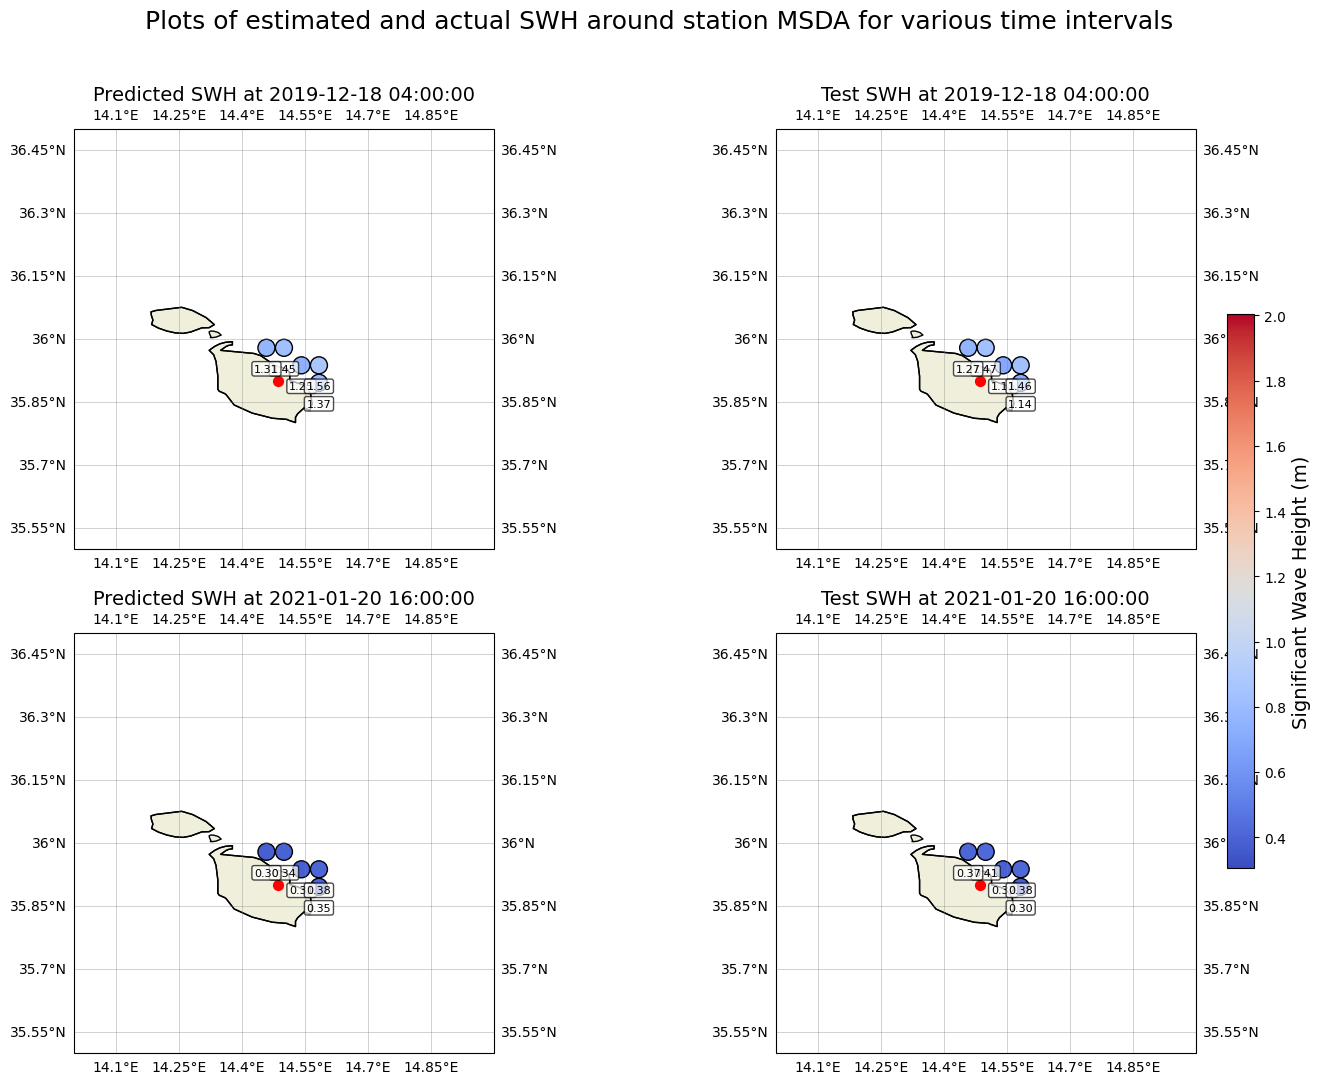

In [49]:
#Plot two timestamps in four subplots - one for pred and one for test for each timestamp
best_Ypred.index = pd.to_datetime(best_Ypred.index)
best_YTest.index = pd.to_datetime(best_YTest.index)

selected_timestamps = [
    pd.to_datetime("2019-12-18 04:00:00"),
    pd.to_datetime("2021-01-20 16:00:00")
]

timestamps_to_plot_pred = best_Ypred.loc[selected_timestamps]
timestamps_to_plot_test = best_YTest.loc[selected_timestamps]

#global min and max to give a consistent colour scale across all the subplots - first five cols contain SWH
vmin = min(best_Ypred.iloc[:, :5].min().min(), best_YTest.iloc[:, :5].min().min())
vmax = max(best_Ypred.iloc[:, :5].max().max(), best_YTest.iloc[:, :5].max().max())

#create the subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12), subplot_kw={'projection': ccrs.PlateCarree()})

#set map extent [west, east, south, north]
map_extent = [14.0, 15.0, 35.5, 36.5]

for idx, (timestamp_pred, timestamp_test) in enumerate(zip(timestamps_to_plot_pred.index, timestamps_to_plot_test.index)):
    ax_pred, ax_test = axes[idx, 0], axes[idx, 1]
    
    #set map extent
    ax_pred.set_extent(map_extent, crs=ccrs.PlateCarree())
    ax_test.set_extent(map_extent, crs=ccrs.PlateCarree())
    
    #add map features
    for ax in [ax_pred, ax_test]:
        ax.add_feature(cfeature.LAND, edgecolor='black')
        ax.add_feature(cfeature.COASTLINE)
        ax.add_feature(cfeature.BORDERS, linestyle=':')
        ax.scatter(14.486952, 35.901233, color='red', marker='o', s=50, label='Seismic Stations')
        ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5)

    #get PREDICTED wave height data for this timestamp
    best_timestamp = best_Ypred.loc[timestamp_pred, :]
    wave_heights_pred = best_timestamp.iloc[:5] #first 5 columns have the SWH for the gridpoints
    coords_pred = wave_heights_pred.index.to_list() #get the coordinates of the gridpoints
    lons_pred, lats_pred = zip(*coords_pred)
    heights_pred = wave_heights_pred.values
    
    #scatter plot for predicted wave heights
    sc_pred = ax_pred.scatter(lats_pred, lons_pred, c=heights_pred, cmap='coolwarm', edgecolor='black', s=150, 
                              vmin=vmin, vmax=vmax)
    ax_pred.set_title(f"Predicted SWH at {timestamp_pred}", fontsize=14)

    for lat, lon, height in zip(lats_pred, lons_pred, heights_pred):
        ax_pred.text(lat, lon-0.05, f"{height:.2f}", fontsize=8, color='black', ha='center', va='center',
                    bbox=dict(facecolor='white', alpha=0.7, edgecolor='black', boxstyle='round,pad=0.2'))

    #get TEST wave height data for this timestamp
    best_timestamp_Test = best_YTest.loc[timestamp_test, :]
    wave_heights_test = best_timestamp_Test.iloc[:5] #first 5 columns have the SWH for the gridpoints
    coords_test = wave_heights_test.index.to_list() #get the coordinates of the gridpoints
    lons_test, lats_test = zip(*coords_test)
    heights_test = wave_heights_test.values

    #scatter plot for test wave heights
    sc_test = ax_test.scatter(lats_test, lons_test, c=heights_test, cmap='coolwarm', edgecolor='black', s=150, 
                              vmin=vmin, vmax=vmax)
    ax_test.set_title(f"Test SWH at {timestamp_test}", fontsize=14)

    for lat, lon, height in zip(lats_test, lons_test, heights_test):
        ax_test.text(lat, lon-0.05, f"{height:.2f}", fontsize=8, color='black', ha='center', va='center',
                    bbox=dict(facecolor='white', alpha=0.7, edgecolor='black', boxstyle='round,pad=0.2'))

#colourbar
cbar = fig.colorbar(sc, ax=axes, orientation='vertical', shrink=0.6, pad=0.02)
cbar.set_label("Significant Wave Height (m)", fontsize=14)

fig.suptitle(f"Plots of estimated and actual SWH around station {station} for various time intervals",fontsize=18)

#plt.savefig('barcharts/bestMAE/sea_median/bestMAE_median_plot.png', bbox_inches='tight')

#plt.show()

# Aesthetic Map

File provided by Geosciences Dept

In [50]:
print(coastline.head())
print(coastline.crs)

   Id                                           geometry
0 NaN  POLYGON ((458635.564 3963434.287, 458635.61 39...
1 NaN  POLYGON ((460268.463 3963960.375, 460268.694 3...
2 NaN  POLYGON ((460547.895 3964817.748, 460547.598 3...
3 NaN  POLYGON ((456786.014 3973289.117, 456785.569 3...
4 NaN  POLYGON ((454418.513 3975967.51, 454418.966 39...
EPSG:32633


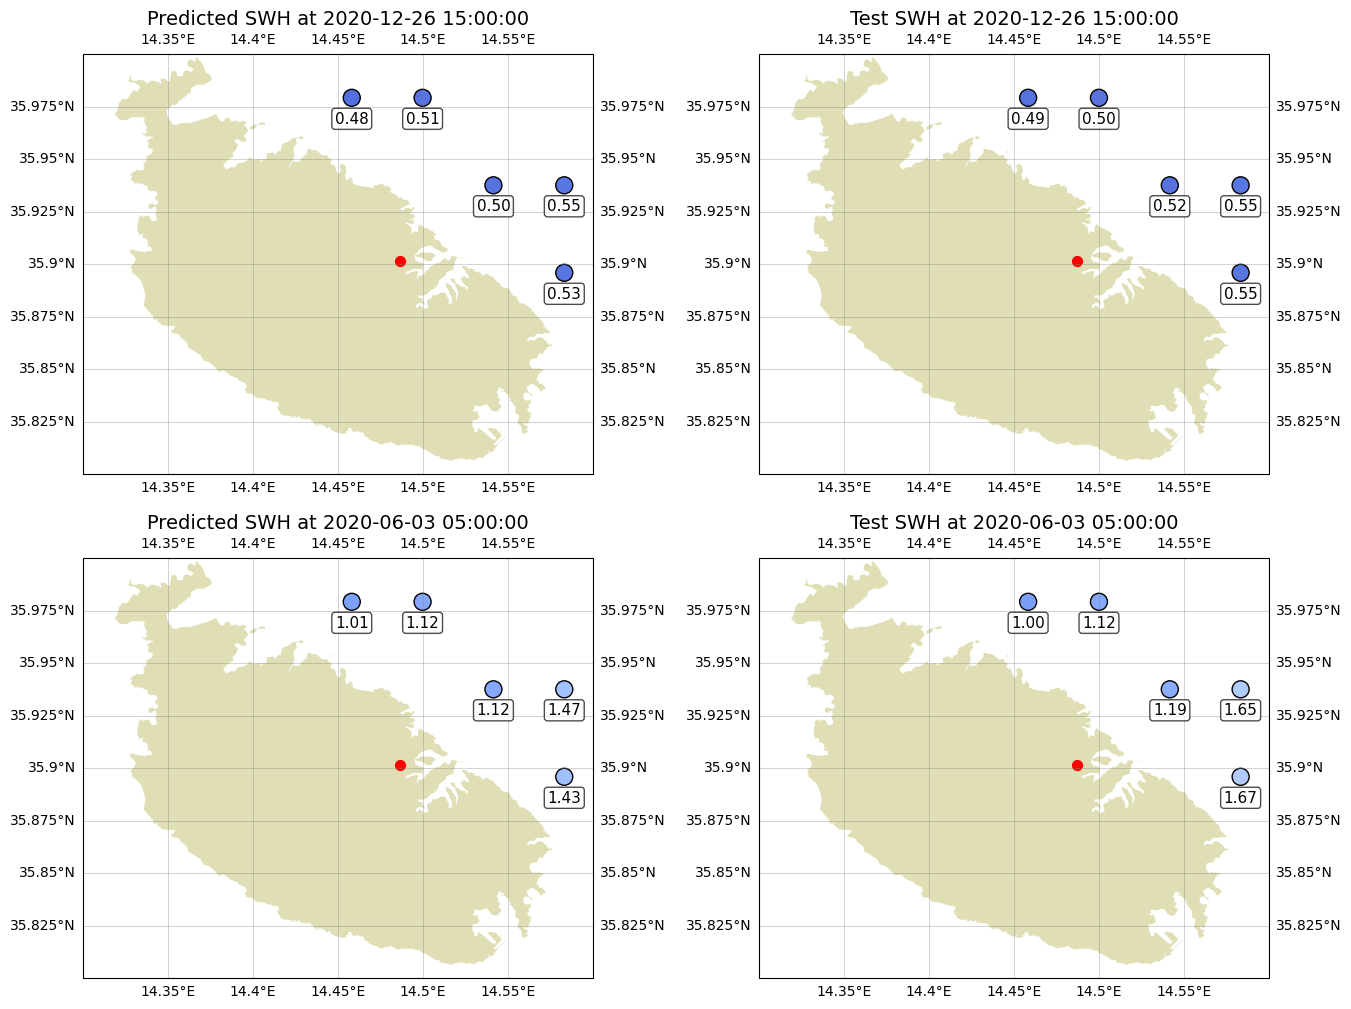

In [66]:
#Plot two timestamps in four subplots - one for pred and one for test for each timestamp
best_Ypred.index = pd.to_datetime(best_Ypred.index)
best_YTest.index = pd.to_datetime(best_YTest.index)

selected_timestamps = [
    pd.to_datetime("2020-12-26 15:00:00"),
    pd.to_datetime("2020-06-03 05:00:00")
]

timestamps_to_plot_pred = best_Ypred.loc[selected_timestamps]
timestamps_to_plot_test = best_YTest.loc[selected_timestamps]

#global min and max to give a consistent colour scale across all the subplots - first five cols contain SWH
vmin = min(best_Ypred.iloc[:, :5].min().min(), best_YTest.iloc[:, :5].min().min())
vmax = max(best_Ypred.iloc[:, :5].max().max(), best_YTest.iloc[:, :5].max().max())

proj = ccrs.PlateCarree()

#create the subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12), subplot_kw={'projection': proj})

#set map extent [west, east, south, north]
map_extent = [14.3, 14.6, 35.8, 36.0]

for idx, (timestamp_pred, timestamp_test) in enumerate(zip(timestamps_to_plot_pred.index, timestamps_to_plot_test.index)):
    ax_pred, ax_test = axes[idx, 0], axes[idx, 1]
    
    #set map extent
    ax_pred.set_extent(map_extent, crs=proj)
    ax_test.set_extent(map_extent, crs=proj)
    
    #add map features
    for ax in [ax_pred, ax_test]:
        #get coastline from file
        coastline.to_crs(epsg=4326).plot(ax=ax, transform=proj, color='#DFDEB4', linewidth=1.5)
        #ax.add_feature(cfeature.LAND, edgecolor='black')
        #ax.add_feature(cfeature.COASTLINE)
        #ax.add_feature(cfeature.BORDERS, linestyle=':')
        ax.scatter(14.486952, 35.901233, color='red', marker='o', s=50, label='Seismic Stations')
        ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5)

    #get PREDICTED wave height data for this timestamp
    best_timestamp = best_Ypred.loc[timestamp_pred, :]
    wave_heights_pred = best_timestamp.iloc[:5] #first 5 columns have the SWH for the gridpoints
    coords_pred = wave_heights_pred.index.to_list() #get the coordinates of the gridpoints
    lons_pred, lats_pred = zip(*coords_pred)
    heights_pred = wave_heights_pred.values
    
    #scatter plot for predicted wave heights
    sc_pred = ax_pred.scatter(lats_pred, lons_pred, c=heights_pred, cmap='coolwarm', edgecolor='black', s=150, 
                              vmin=vmin, vmax=vmax)
    ax_pred.set_title(f"Predicted SWH at {timestamp_pred}", fontsize=14)

    for lat, lon, height in zip(lats_pred, lons_pred, heights_pred):
        ax_pred.text(lat, lon-0.01, f"{height:.2f}", fontsize=11, color='black', ha='center', va='center',
                    bbox=dict(facecolor='white', alpha=0.7, edgecolor='black', boxstyle='round,pad=0.2'))

    #get TEST wave height data for this timestamp
    best_timestamp_Test = best_YTest.loc[timestamp_test, :]
    wave_heights_test = best_timestamp_Test.iloc[:5] #first 5 columns have the SWH for the gridpoints
    coords_test = wave_heights_test.index.to_list() #get the coordinates of the gridpoints
    lons_test, lats_test = zip(*coords_test)
    heights_test = wave_heights_test.values

    #scatter plot for test wave heights
    sc_test = ax_test.scatter(lats_test, lons_test, c=heights_test, cmap='coolwarm', edgecolor='black', s=150, 
                              vmin=vmin, vmax=vmax)
    ax_test.set_title(f"Test SWH at {timestamp_test}", fontsize=14)

    for lat, lon, height in zip(lats_test, lons_test, heights_test):
        ax_test.text(lat, lon-0.01, f"{height:.2f}", fontsize=11, color='black', ha='center', va='center',
                    bbox=dict(facecolor='white', alpha=0.7, edgecolor='black', boxstyle='round,pad=0.2'))

#colourbar
#cbar = fig.colorbar(sc, ax=axes, orientation='vertical', shrink=0.6, pad=0.02)
#cbar.set_label("Significant Wave Height (m)", fontsize=14)

#fig.suptitle(f"Plots of estimated and actual SWH around station {station} for various time intervals",fontsize=18)

#plt.savefig('barcharts/bestMAE/sea_median/bestMAE_median_plot.png', bbox_inches='tight')

plt.show()

# Time Series

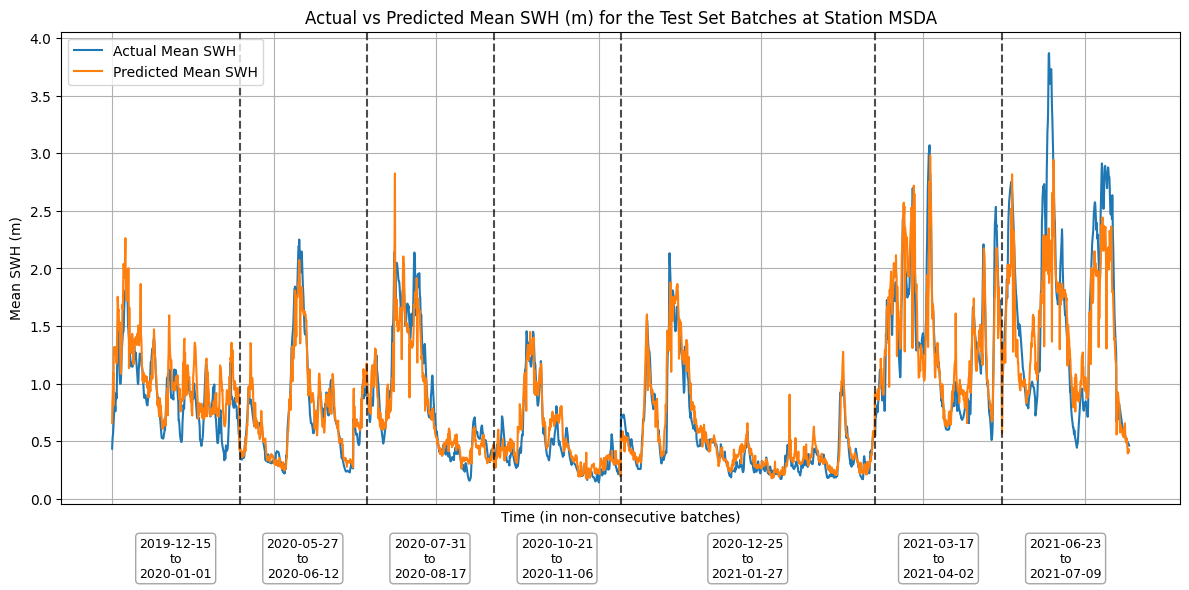

In [61]:
best_YTest.index = pd.to_datetime(best_YTest.index)
best_Ypred.index = pd.to_datetime(best_Ypred.index)

#YTest and Ypred share the same index
sea_mean_df = pd.DataFrame({'Actual': best_YTest.loc[best_Ypred.index, 'sea_mean'],
                            'Predicted': best_Ypred.loc[best_Ypred.index, 'sea_mean']
                           })

#reset the index to plot skipped parts where there is no data
sea_mean_df = sea_mean_df.reset_index()
sea_mean_df.rename(columns={'index': 'Timestamp'}, inplace=True)
sea_mean_df = sea_mean_df.sort_values('Timestamp').reset_index(drop=True)

#find when time gap is greater than 2 hours
time_deltas = sea_mean_df['Timestamp'].diff().dt.total_seconds() / 3600 #convert to hours
vline_spacing = time_deltas[time_deltas >= 2].index.tolist()

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(sea_mean_df.index, sea_mean_df['Actual'], label='Actual Mean SWH')
ax.plot(sea_mean_df.index, sea_mean_df['Predicted'], label='Predicted Mean SWH')

#plot vertical lines
for x in vline_spacing:
    ax.axvline(x=x, color='black', alpha=0.7, linestyle='--')

#get xlabels
chunk_ends = [vline_spacing[0]-1] + [vline_spacing[j+1]-1 for j in range(len(vline_spacing)-1)] + [len(sea_mean_df)-1]
chunk_starts = [0] + vline_spacing

for start, end in zip(chunk_starts, chunk_ends):
    midpoint = (start + end) // 2
    start_time = sea_mean_df.loc[start, 'Timestamp'].strftime('%Y-%m-%d')
    end_time = sea_mean_df.loc[end, 'Timestamp'].strftime('%Y-%m-%d')
    label = f"{start_time}\nto\n{end_time}"

    ax.text(midpoint, -0.07, label, transform=ax.get_xaxis_transform(),
            ha='center', va='top', fontsize=9,
            bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='gray', alpha=0.7))
    
#switch off default x ticks, major and minor, from the bottom and the top and remove xlabels
plt.tick_params(axis='x',which='both', bottom=False, top=False, labelbottom=False)

plt.xlabel("Time (in non-consecutive batches)")
plt.ylabel("Mean SWH (m)")
plt.title(f"Actual vs Predicted Mean SWH (m) for the Test Set Batches at Station {station}")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()